In [1]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Select only setosa and versicolor

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [4]:
# Extract sepal length and petal length (columns 0 and 2)
X = df.iloc[0:100, [0, 2]].values

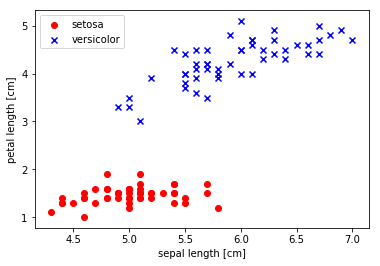

In [5]:
# plot
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

In [6]:
from perceptron import Perceptron

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

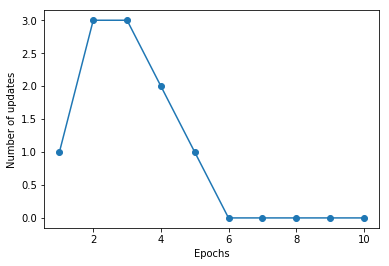

In [8]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Meshgrid: this utility 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                   y=X[ y== cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor="black")
    return
   

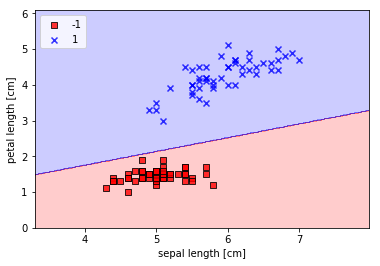

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

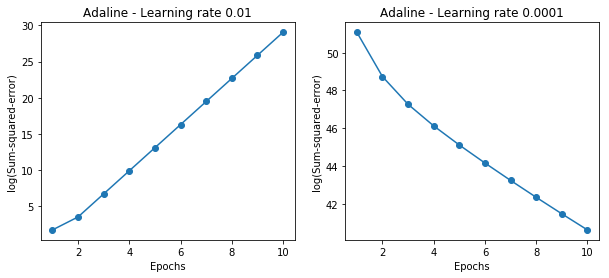

In [11]:
# Now starting to consider ADALINE

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
from adalineGD import AdalineGD
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Adaline - Learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
ax[1].set_title("Adaline - Learning rate 0.0001")
plt.show()

In [12]:
# Start the standardization

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [13]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

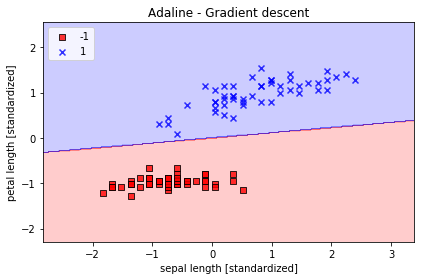

In [14]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Gradient descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

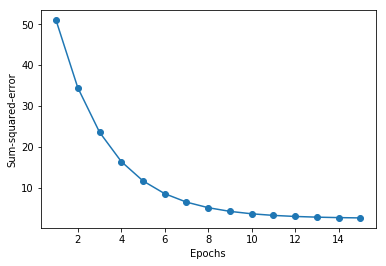

In [15]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.show()

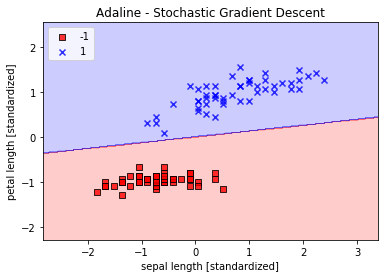

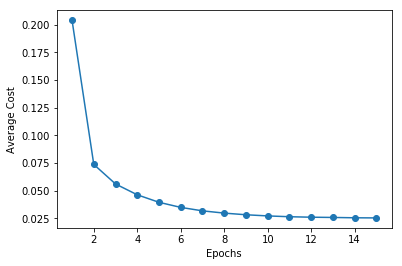

In [16]:
# Now trying AdalineSGD

from adalineSGD import AdalineSGD
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average Cost")
plt.show()
